In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../data/training_sample.csv")
df.head(3)

,unitID,weekID,outcome,treatment,X1,X2,X3,C1,C2,C3
0,UNIT01155,0,470,0.0,64.225447,88362,0,M,KF7,E_2
1,UNIT01155,1,534,0.0,64.225447,87892,0,M,KF7,E_2
2,UNIT01155,2,550,0.0,64.225447,87358,0,M,KF7,E_2


# Data Characteristics

## No missing values

In [24]:
df.isnull().sum()

unitID       0
weekID       0
outcome      0
treatment    0
X1           0
X2           0
X3           0
C1           0
C2           0
C3           0
dtype: int64

## 3908 units, 95 time steps each

In [9]:
# No. of units
df['unitID'].nunique()

3908

In [10]:
# Time steps
df['weekID'].min(), df['weekID'].max()

(0, 94)

In [14]:
# Checking if each unit has data for 95 time steps
df['weekID'].value_counts().value_counts()

3908    95
Name: weekID, dtype: int64

## Treatment variable (Z)

### 6 Treatment levels

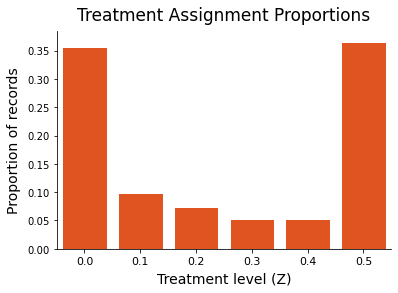

In [114]:
s = df['treatment'].value_counts()
s = s/s.sum()

plt.figure(figsize=(6,4))
sns.barplot(x=s.index, y=s.values, color="orangered", edgecolor='white')
plt.xticks(size=11)
plt.xlabel(r"Treatment level (Z)", fontsize=14, labelpad=6)
plt.ylabel("Proportion of records", fontsize=14, labelpad=6)
plt.title("Treatment Assignment Proportions", size=17, pad=11)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

1. Z=0 and Z=5 together make up over 70% of the treatment assignments.
2. Treatments 1-4 individually represent < 10% data.

### How do Treatment assignments evolve over time?

For each unit, the sequence of treatments represent a time series over 95 time steps. We can find pairwise similarities between these time series and use clustering to find if there are groups of units that had similar treatment assignments.

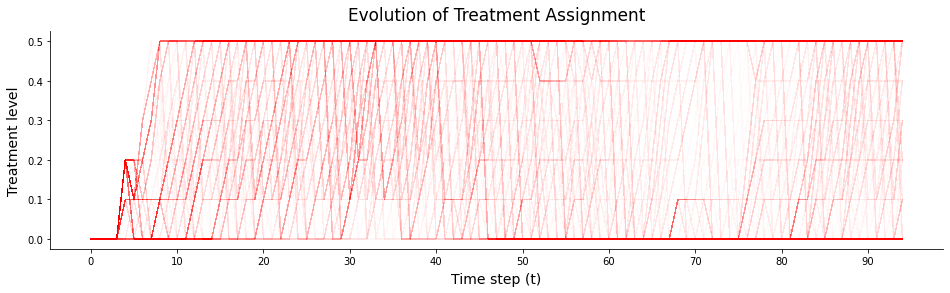

In [81]:
plt.figure(figsize=(16,4))
for unit in df['unitID'].unique()[:1000]:
    plt.plot(list(range(95)), df[df['unitID']==unit]['treatment'], alpha=0.002, color='red')

plt.xticks(list(range(0,95,10)), list(range(0,95,10)))
plt.xlabel(r"Time step (t)", fontsize=14, labelpad=6)
plt.ylabel("Treatment level (Z)", fontsize=14, labelpad=6)
plt.title("Evolution of Treatment Assignment", size=17, pad=11)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

1. Although each unit has a different timeline of treatment assignments, there are common patterns (that appear as dark shades in the plot).
2. For instance, most units start with a treatment level of 0 and after 3 time steps, the treatment level is turned to 1 or 2.
3. Many units are assigned back to treatment 0 after about 45 time steps.
4. It seems like whenever the treatment level is changed to a value between 1-4, the response is tested for a few time steps (horizontal lines), based on which the treatment is modified. 

### Relationship of Treatment with outcome

In [88]:
round(np.corrcoef(df['treatment'], df['outcome'])[0,1], 3)  # Overall ~0 correlation

-0.096

/Users/sargunnagpal/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


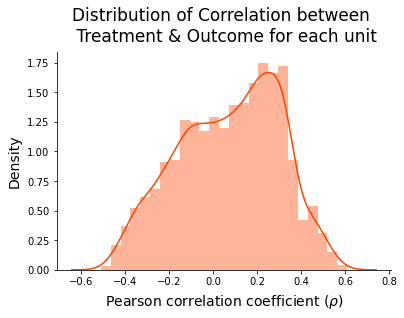

In [118]:
# Correlation between Treatment & Outcome for each unit
cors = df.groupby(by='unitID').apply(lambda x: np.corrcoef(x['treatment'], x['outcome'])[0,1])

plt.figure(figsize=(6,4))
sns.distplot(cors, color='orangered')
plt.xlabel(r"Pearson correlation coefficient $(\rho)$", fontsize=14, labelpad=6)
plt.ylabel("Density", fontsize=14, labelpad=6)
plt.title("Distribution of Correlation between \n Treatment & Outcome for each unit", size=17, pad=11)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

1. Some units have a positive correlation between the treatment level and outcome, while others have a negative correlation.
2. Most units have a weak positive correlation ~0.3 (mode of the distribution).

## Summary of Covariates

### X1

In [19]:
df.groupby(by='unitID')['X3'].mean().max()

0.24210526315789474

/Users/sargunnagpal/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X3', ylabel='Density'>

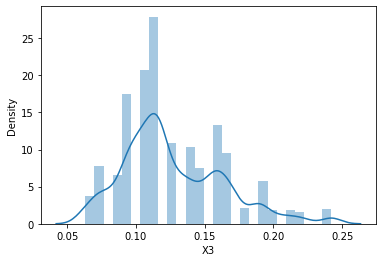

In [18]:
sns.distplot(df.groupby(by='unitID')['X3'].mean())

In [15]:
df['X3'].value_counts()

0    324279
1     46981
Name: X3, dtype: int64

/Users/sargunnagpal/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X2', ylabel='Density'>

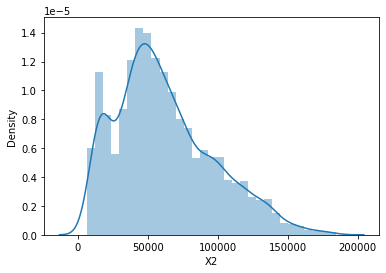

In [14]:
sns.distplot(df[df['weekID']==0]['X2'])

/Users/sargunnagpal/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X1', ylabel='Density'>

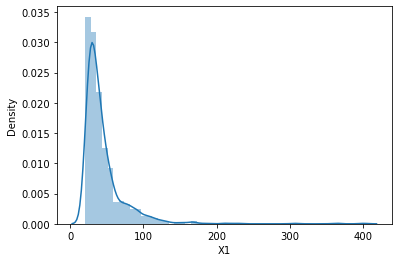

In [13]:
sns.distplot(df[df['weekID']==0]['X1']`)

In [11]:
df[df['weekID']==0]['C3'].value_counts().sort_index()

E_1    750
E_2    745
E_3    531
E_4    467
E_5    794
E_6    621
Name: C3, dtype: int64

In [10]:
s = df[df['weekID']==0]['C2'].value_counts().value_counts()
s/s.sum()

1    0.591984
2    0.286573
3    0.092986
4    0.020842
5    0.006814
6    0.000802
Name: C2, dtype: float64

In [7]:
df[df['weekID']==0]['C1'].value_counts().sort_index()

A    302
B    257
C    221
D    259
E    259
F    217
G    259
H    266
I    238
J    291
K    255
L    276
M    261
N    257
O    290
Name: C1, dtype: int64

### What's different about units that have a high correlation bw treatment level and outcome?

In [124]:
df[df.unitID.isin(cors[cors > 0.4].index)]

,unitID,weekID,outcome,treatment,X1,X2,X3,C1,C2,C3
1710,UNIT00625,0,170,0.0,31.446804,75452,0,G,UD4,E_1
1711,UNIT00625,1,169,0.0,31.446804,75282,0,G,UD4,E_1
1712,UNIT00625,2,139,0.0,31.446804,75113,0,G,UD4,E_1
1713,UNIT00625,3,182,0.0,31.446804,74974,0,G,UD4,E_1
1714,UNIT00625,4,913,0.2,31.446804,74792,1,G,UD4,E_1
...,...,...,...,...,...,...,...,...,...,...
370305,UNIT05949,90,0,0.3,33.053924,55968,0,L,XK5,E_6
370306,UNIT05949,91,0,0.3,33.053924,55968,0,L,XK5,E_6
370307,UNIT05949,92,462,0.5,33.053924,55968,0,L,XK5,E_6
370308,UNIT05949,93,478,0.5,33.053924,55506,0,L,XK5,E_6
